# Verification tests on DC2 metacal catalog
Owner: Francois Lanusse 
Last Run: May 13th, 2019

This notebook intends to demonstrates the data access to a metacal catalog produced with the stack, through the GCR, as well running some basic checks.

In [2]:
%pylab inline

# Temporary fix while GCRCatalogs is updated
import sys
sys.path.insert(0, '/global/homes/f/flanusse/repo/gcr-catalogs/') # You need the master branch of gcr-catalogs: https://github.com/LSSTDESC/gcr-catalogs
import GCRCatalogs
from GCR import GCRQuery

Populating the interactive namespace from numpy and matplotlib


/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/register.py:23: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


In [3]:
catalog = GCRCatalogs.load_catalog('dc2_object_run1.2i_tract5063_with_metacal.yaml');

/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_dm_catalog.py:221: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(schema_stream)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_dm_catalog.py:150: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  base_dict = yaml.load(ofile)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_object.py:506: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(schema_stream)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_object.py:420: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Ple

In [13]:
# We only have access to the reference catalog for now, so let's only select objects with i-band as the reference
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts
mask &= catalog['mcal_s2n'] > 10                       # Apply basic signal to noise cut
mask &= catalog['extendedness'] > 0
mask &= np.isfinite(catalog['mcal_mag_i']) & np.isfinite(catalog['mag_i_cModel'])
mask &= catalog['xy_flag'] == 0
mask &= catalog['ext_shapeHSM_HsmShapeRegauss_resolution'] >= 0.3

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater_equal


## Comparing fluxes and magnitudes

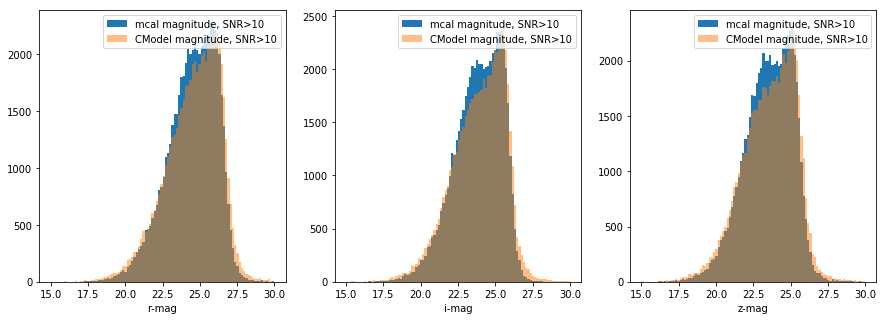

In [14]:
figure(figsize=(15,5))
subplot(131)
hist(catalog['mcal_mag_r'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_r_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);
legend()
xlabel('r-mag')

subplot(132)
hist(catalog['mcal_mag_i'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_i_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);
legend()
xlabel('i-mag')

subplot(133)
hist(catalog['mcal_mag_z'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_z_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);
legend()
xlabel('z-mag');

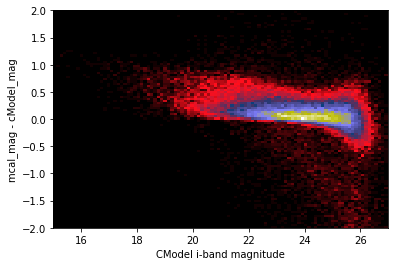

In [15]:
hist2d(catalog['mag_i_cModel'][mask], catalog['mcal_mag_i'][mask]  -  catalog['mag_i_cModel'][mask], 100,range=[[15,27], [-2,2]], cmap='gist_stern');
xlabel('CModel i-band magnitude');
ylabel('mcal_mag - cModel_mag');

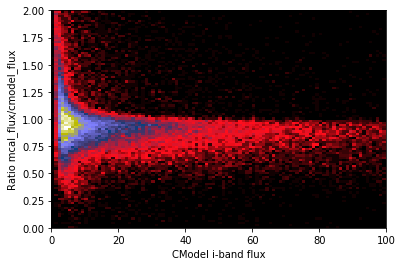

In [16]:
hist2d(catalog['modelfit_CModel_instFlux'][mask], catalog['mcal_flux_i'][mask] / catalog['modelfit_CModel_instFlux'][mask], 100,range=[[0,100], [0,2]], cmap='gist_stern');
xlabel('CModel i-band flux');
ylabel('Ratio mcal_flux/cmodel_flux');

## Basic shape tests

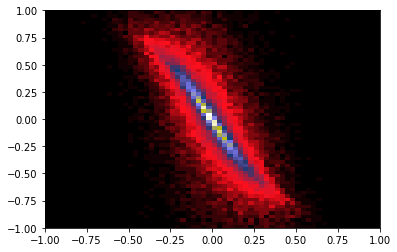

In [26]:
hist2d(catalog['mcal_g1'][mask], catalog['ext_shapeHSM_HsmShapeRegauss_e1'][mask],
       64, range=[[-1,1],[-1,1]], cmap='gist_stern');

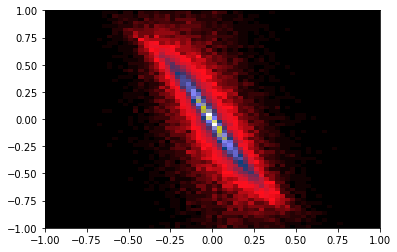

In [24]:
hist2d(catalog['mcal_g2'][mask], catalog['ext_shapeHSM_HsmShapeRegauss_e2'][mask],
       64, range=[[-1,1],[-1,1]], cmap='gist_stern');